### Graham Kerr
#### graham.s.kerr@NASA.gov; kerrg@cua.edu

<H1 font size="+3" style="color:red">
OZ project Project<br>
-- Q_12 Cross Sections Examples
</H1>

<b>This notebook will fit impact ionisation cross sections for</b> 
    
 > - <b>H(1s)* + p = H(n=2)* + p + e</b> <br>
> Taken from Janev et al 1993 IAEA atomic data tables. They provide fits, so here I just use their results and plot to make sure they extend to higher energies in a sensible way. I tried my own fits here, but their fit works
well already. 

 > - <b>H(1s)* + H = H(n=2)* + H + e</b> <br>
 >  https://iopscience.iop.org/article/10.1088/0022-3700/12/17/016/pdf 
 
 > - <b>H(1s)* + E = H(n=2)* + H + e</b> <br>
> Taken from Janev et al 1993 IAEA atomic data tables. They provide fits, so here I just use their results and plot to make sure they extend to higher energies in a sensible way. I tried my own fits here, but their fit works
well already.  
 



---
### <b style="color:blue"> Some set up </b>

***Import Modules***

In [1]:
##
## Import some modules
##

import sys
sys.path.insert(0,'/Users/gskerr1/Documents/Research/Python_Programs/radynpy/')
sys.path.insert(0,'/Users/gskerr1/Documents/Research/OrrallZirkerEffect/')


import radynpy
import OrrallZirkerPy as OZpy
# from OrrallZirkerPy import CrossSections
from OrrallZirkerPy.CrossSections import chebyshev_fn as Cheb
from numpy.polynomial.polynomial import Polynomial as Poly



import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib.ticker import LogLocator
from matplotlib import ticker
import matplotlib.colorbar as cb
import pandas as pd

import cmocean
import colorcet as ccet
import palettable as pal 
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [386]:
import importlib
importlib.reload(OZpy.CrossSections)




<module 'OrrallZirkerPy.CrossSections' from '/Users/gskerr1/Documents/Research/OrrallZirkerEffect/OrrallZirkerPy/CrossSections.py'>

***Set up plot properties***

In [3]:
##
## Plot properties (these are just personal preference)
##

#Avenir LT Std
font = {'family': 'Avenir LT Std',
        'color':  'black',
        'weight': 'medium',
        'size': 22,
        }
plot_params = {'ytick.direction': 'in', 
               'xtick.direction': 'in', 
               'xtick.minor.visible': True,
               'ytick.minor.visible': True,
               'xtick.major.size': 10, 'xtick.minor.size': 5,
               'ytick.major.size': 10, 'ytick.minor.size': 5,
               'ytick.right': False,
               'xtick.top': False,
               'ytick.major.width': 1.5,
               'xtick.major.width': 1.5,
               'ytick.minor.width': 1.5,
               'xtick.minor.width': 1.5,
               'axes.linewidth': 1.5,
               'axes.spines.top': False,
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': False,
               'axes.titlepad' : 18 }

plot_lg_params = {'legend.frameon': False}
#plt.rcParams.update({'font.size': font['size'], 'font.family':font['family'], 'font.weight':font['weight'], 'font.color':font['color']})

plt.rcParams.update({'font.size':font['size'], 'font.family':font['family'], 'font.weight':font['weight']})
plt.rcParams.update({'ytick.direction': plot_params['ytick.direction'],
                     'xtick.direction': plot_params['xtick.direction'],
                     'xtick.minor.visible': plot_params['xtick.minor.visible'],
                     'ytick.minor.visible': plot_params['ytick.minor.visible'],
                     'ytick.major.size':  plot_params['ytick.major.size'], 
                     'ytick.minor.size':  plot_params['ytick.minor.size'],
                     'xtick.major.size':  plot_params['xtick.major.size'],                                
                     'xtick.minor.size':  plot_params['xtick.minor.size'],
                     'ytick.right': plot_params['ytick.right'],
                     'xtick.top': plot_params['xtick.top'],
                     'ytick.major.width': plot_params['ytick.major.width'],
                     'xtick.major.width': plot_params['xtick.major.width'],
                     'ytick.minor.width': plot_params['ytick.minor.width'],
                     'xtick.minor.width': plot_params['xtick.minor.width'],                    
                     'axes.linewidth': plot_params['axes.linewidth'],
                     'axes.spines.top' : plot_params['axes.spines.top'],
                     'axes.spines.bottom' : plot_params['axes.spines.bottom'],
                     'axes.spines.left' : plot_params['axes.spines.left'],
                     'axes.spines.right' : plot_params['axes.spines.right'],
                     'axes.titlepad' : plot_params['axes.titlepad'],
                    })

plt.rcParams.update({'legend.frameon': plot_lg_params['legend.frameon']})

mpl.mathtext.SHRINK_FACTOR = 0.6
mpl.mathtext.GROW_FACTOR = 1 / 0.6





template = dict(
        layout = go.Layout(font = dict(family = "Rockwell", size = 18),
                           title_font = dict(family = "Rockwell", size = 22), 
                           plot_bgcolor = 'white',
                           paper_bgcolor = 'white',
                           xaxis = dict(
                                showexponent = 'all',
                                exponentformat = 'e',
                                tickangle = 0,
                                linewidth = 4,
                                showgrid = True,
                            ),
                            yaxis = dict(
                          showexponent = 'all',
                          exponentformat = 'e',
                                linewidth = 4,
                                showgrid = True,
                                anchor = 'free',
                                position = 0,
                                domain = [0.0,1]
                            ),
                            coloraxis_colorbar = dict(
                                thickness = 15,
                                tickformat = '0.2f',
                                ticks = 'outside',
                                titleside = 'right'
                            )
                            ))

---
### <b style="color:blue"> Calculate or extract the cross sections </b>

***Set up the CrossSec object with requested energy values***

In [376]:
energy = np.arange(1,8001,1)
energy_low = np.arange(20/1e3, 1e6/100, 1e-3)
cs = OZpy.CrossSections.CrossSec(energy)
cs_low = OZpy.CrossSections.CrossSec(energy_low)

In [377]:
##
## These are the data that will be fit
##
iaea93_Q_12P = OZpy.CrossSections.cs_iaea93_Q_12P()
iaea93_Q_12E = OZpy.CrossSections.cs_iaea93_Q_12E()
iaea93_Q_13E = OZpy.CrossSections.cs_iaea93_Q_13E()
mb83 = OZpy.CrossSections.cs_mb83()
hill79 = OZpy.CrossSections.cs_hill79()

kerr = cs.cs_kerr_poly()
kerr_ch = cs.cs_kerr_cheb()
# kerr_low= cs_low.cs_kerr_poly()
# kerr_ch_low = cs_low.cs_kerr_cheb()



***Plot underlying data for sanity checks***





> - Q_12P

Text(0, 0.5, 'log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')

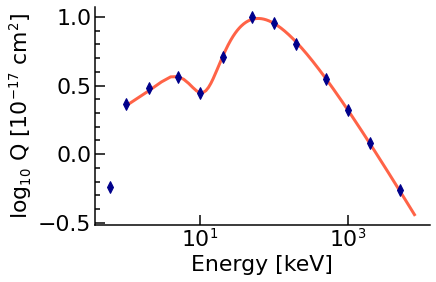

In [243]:
plt.plot(kerr.energy, np.log10(kerr.Q_12P), 
         linestyle = '-', linewidth = 3, color = 'tomato')
plt.plot(iaea93_Q_12P.energy, np.log10(iaea93_Q_12P.Q_12P), 
         linestyle = 'none', marker = 'd', markersize = 8, color = 'darkblue')

plt.xscale('log')
plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')

# plt.axvline(x=500)
# plt.axvline(x=1500)


> - Q_12E

Text(0, 0.5, 'log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')

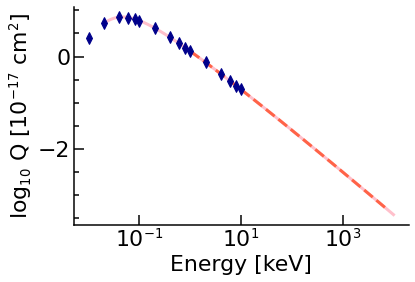

In [234]:
plt.plot(kerr_low.energy, (np.log10(kerr_low.Q_12E)), 
         linestyle = '-', linewidth = 3, color = 'pink')
plt.plot(kerr.energy, (np.log10(kerr.Q_12E)), 
         linestyle = '--', linewidth = 3, color = 'tomato')
plt.plot(iaea93_Q_12E.energy, np.log10(iaea93_Q_12E.Q_12E), 
         linestyle = 'none', marker = 'd', markersize = 8, color = 'darkblue')


plt.xscale('log')
plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')

# plt.axvline(x=500)
# plt.axvline(x=1500)


---
### <b style="color:blue"> Do the fits </b>

***Fit the various cross sections***

> - Q_1pP

In [256]:
e1_P = 6e2/1e3
e2_P = 5e6/1e3

cfit_Q12P_4deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(iaea93_Q_12P.energy, 
                                                          iaea93_Q_12P.Q_12P, emin = e1_P, emax = e2_P, deg = 4)
cfit_Q12P_5deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(iaea93_Q_12P.energy, 
                                                          iaea93_Q_12P.Q_12P, emin = e1_P, emax = e2_P, deg = 5)
cfit_Q12P_6deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(iaea93_Q_12P.energy, 
                                                          iaea93_Q_12P.Q_12P, emin = e1_P, emax = e2_P, deg = 6)
cfit_Q12P_7deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(iaea93_Q_12P.energy, 
                                                          iaea93_Q_12P.Q_12P, emin = e1_P, emax = e2_P, deg = 7)
cfit_Q12P_8deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(iaea93_Q_12P.energy, 
                                                          iaea93_Q_12P.Q_12P, emin = e1_P, emax = e2_P, deg = 8)

pfit_Q12P_4deg = OZpy.CrossSections.cs_polyfit(iaea93_Q_12P.energy, iaea93_Q_12P.Q_12P,  
                                                       order = 4, log10E = True, log10Q = True)
pfit_Q12P_5deg = OZpy.CrossSections.cs_polyfit(iaea93_Q_12P.energy, iaea93_Q_12P.Q_12P,  
                                                       order = 5, log10E = True, log10Q = True)
pfit_Q12P_6deg = OZpy.CrossSections.cs_polyfit(iaea93_Q_12P.energy, iaea93_Q_12P.Q_12P,  
                                                       order = 6, log10E = True, log10Q = True)
pfit_Q12P_7deg = OZpy.CrossSections.cs_polyfit(iaea93_Q_12P.energy, iaea93_Q_12P.Q_12P,  
                                                       order = 7, log10E = True, log10Q = True)
pfit_Q12P_8deg = OZpy.CrossSections.cs_polyfit(iaea93_Q_12P.energy, iaea93_Q_12P.Q_12P,  
                                                       order = 8, log10E = True, log10Q = True)


In [257]:
##
## Do the straight line fit to the high energy range
##
estart = np.abs(iaea93_Q_12P.energy - 5e5/1e3).argmin()
eend = np.abs(iaea93_Q_12P.energy - 5e6).argmin()
energy2fit = iaea93_Q_12P.energy[estart:eend+1]
csec2fit = iaea93_Q_12P.Q_12P[estart:eend+1]

pfit_Q12P_2deg_end = OZpy.CrossSections.cs_polyfit(energy2fit, csec2fit,  
                                                       order = 2, log10E = True, log10Q = True)
pfit_Q12P_1deg_end = OZpy.CrossSections.cs_polyfit(energy2fit, csec2fit,  
                                                       order = 1, log10E = True, log10Q = True)



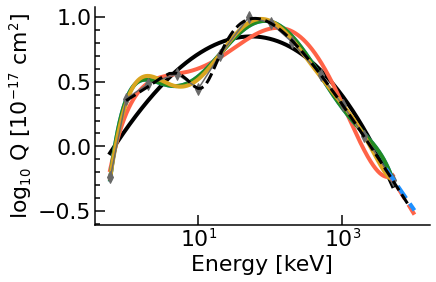

In [264]:
##
## Plot the Q_12P results (poly)
##
energy2plot = np.arange(6e2, 5e6, 1)/1e3
plt.plot((energy2plot), 
                   (pfit_Q12P_4deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'black',
                 )
plt.plot((energy2plot), 
                   (pfit_Q12P_5deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'tomato',
                 )
plt.plot((energy2plot), 
                   (pfit_Q12P_6deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'dodgerblue',
                 )
plt.plot((energy2plot), 
                   (pfit_Q12P_7deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'forestgreen',
                 )
plt.plot((energy2plot), 
                   (pfit_Q12P_8deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'goldenrod'
                 )
plt.plot(iaea93_Q_12P.energy, np.log10(iaea93_Q_12P.Q_12P), marker = 'd', markersize = 8, color = 'dimgrey')

energy2plot = np.arange(4e3, 10001,1)
plt.plot((energy2plot), 
                   (pfit_Q12P_2deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'tomato',
                 )
plt.plot((energy2plot), 
                   (pfit_Q12P_1deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'dodgerblue',
                 )

plt.plot(energy, np.log10(kerr.Q_12P), color = 'black', linestyle = '--', linewidth = 3)

# plt.xlim([5,20])
# plt.ylim([-1,0])
plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')




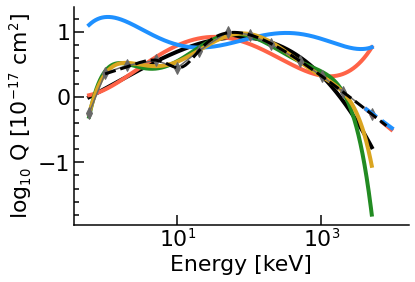

In [265]:
##
## Plot the Q_12P results (cheb)
##

energy2plot = np.arange(6e2, 5e6, 1)/1e3
plt.plot((energy2plot), 
                   (np.log10(np.exp(Cheb(energy2plot, cfit_Q12P_4deg, len(cfit_Q12P_4deg)-1, e1_P, e2_P)))),
                   linewidth = 4, linestyle = '-', color = 'black',
                 )
plt.plot((energy2plot), 
                   (np.log10(np.exp(Cheb(energy2plot, cfit_Q12P_5deg, len(cfit_Q12P_5deg)-1, e1_P, e2_P)))),
                   linewidth = 4, linestyle = '-', color = 'tomato',
                 )
plt.plot((energy2plot), 
                   (np.log10(np.exp(Cheb(energy2plot, cfit_Q12P_6deg, len(cfit_Q12P_6deg)-1, e1_P, e2_P)))),
                   linewidth = 4, linestyle = '-', color = 'dodgerblue',
                 )
plt.plot((energy2plot), 
                   (np.log10(np.exp(Cheb(energy2plot, cfit_Q12P_7deg, len(cfit_Q12P_7deg)-1, e1_P, e2_P)))),
                   linewidth = 4, linestyle = '-', color = 'forestgreen',
                 )
plt.plot((energy2plot), 
                   (np.log10(np.exp(Cheb(energy2plot, cfit_Q12P_8deg, len(cfit_Q12P_8deg)-1, e1_P, e2_P)))),
                   linewidth = 4, linestyle = '-', color = 'goldenrod'
                 )
plt.plot(iaea93_Q_12P.energy, np.log10(iaea93_Q_12P.Q_12P), marker = 'd', markersize = 8, color = 'dimgrey')

energy2plot = np.arange(4e3, 10001,1)
plt.plot((energy2plot), 
                   (pfit_Q12P_2deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'tomato',
                 )
plt.plot((energy2plot), 
                   (pfit_Q12P_1deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'dodgerblue',
                 )

plt.plot(energy, np.log10(kerr.Q_12P), color = 'black', linestyle = '--', linewidth = 3)

# plt.xlim([5,20])
# plt.ylim([-1,0])
plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')


# plt.plot(energy, np.log10(kerr.Q_1pP),linewidth=2, color = 'forestgreen')
# plt.plot(energy, np.log10(kerr_ch.Q_1pP),linewidth=2, color = 'red')




(-1.5, 1.2)

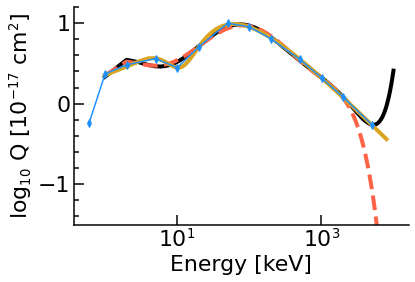

In [281]:
## 
## Compare the polynomial to chebyshev fit 
##

energy2plot = np.arange(1, 10001, 1)


plt.plot((energy2plot), 
                   (pfit_Q12P_8deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'black'
                 )
plt.plot((energy2plot), 
                   (np.log10(np.exp(Cheb(energy2plot, cfit_Q12P_8deg, len(cfit_Q12P_8deg)-1, e1_P, e2_P)))),
                   linewidth = 4, linestyle = '--', color = 'tomato',
                 )
plt.plot(kerr.energy, np.log10(kerr.Q_12P),linestyle = '-',linewidth=4, color = 'goldenrod')
plt.plot(iaea93_Q_12P.energy, np.log10(iaea93_Q_12P.Q_12P), marker = 'd', markersize = 5, color = 'dodgerblue')


plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')
plt.ylim([-1.5, 1.2])


> - Q_12E

In [284]:
e1_E = 1.02e1/1e3
e2_E = 1e4/1e3

cfit_Q12E_4deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(iaea93_Q_12E.energy, 
                                                          iaea93_Q_12E.Q_12E, emin = e1_E, emax = e2_E, deg = 4)
cfit_Q12E_5deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(iaea93_Q_12E.energy,
                                                          iaea93_Q_12E.Q_12E, emin = e1_E, emax = e2_E, deg = 5)
cfit_Q12E_6deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(iaea93_Q_12E.energy, 
                                                          iaea93_Q_12E.Q_12E, emin = e1_E, emax = e2_E, deg = 6)
cfit_Q12E_7deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(iaea93_Q_12E.energy, 
                                                          iaea93_Q_12E.Q_12E, emin = e1_E, emax = e2_E, deg = 7)
cfit_Q12E_8deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(iaea93_Q_12E.energy, 
                                                          iaea93_Q_12E.Q_12E, emin = e1_E, emax = e2_E, deg = 8)

pfit_Q12E_4deg = OZpy.CrossSections.cs_polyfit(iaea93_Q_12E.energy, iaea93_Q_12E.Q_12E,  
                                                       order = 4, log10E = True, log10Q = True)
pfit_Q12E_5deg = OZpy.CrossSections.cs_polyfit(iaea93_Q_12E.energy, iaea93_Q_12E.Q_12E,  
                                                       order = 5, log10E = True, log10Q = True)
pfit_Q12E_6deg = OZpy.CrossSections.cs_polyfit(iaea93_Q_12E.energy, iaea93_Q_12E.Q_12E,  
                                                       order = 6, log10E = True, log10Q = True)
pfit_Q12E_7deg = OZpy.CrossSections.cs_polyfit(iaea93_Q_12E.energy, iaea93_Q_12E.Q_12E,  
                                                       order = 7, log10E = True, log10Q = True)
pfit_Q12E_8deg = OZpy.CrossSections.cs_polyfit(iaea93_Q_12E.energy, iaea93_Q_12E.Q_12E,  
                                                       order = 8, log10E = True, log10Q = True)


In [285]:
##
## Do the straight line fit to the high energy range
##
estart = np.abs(iaea93_Q_12E.energy - 1e3/1e3).argmin()
eend = np.abs(iaea93_Q_12E.energy - 1e3).argmin()
energy2fit = iaea93_Q_12E.energy[estart:eend+1]
csec2fit = iaea93_Q_12E.Q_12E[estart:eend+1]

pfit_Q12E_2deg_end = OZpy.CrossSections.cs_polyfit(energy2fit, csec2fit,  
                                                       order = 2, log10E = True, log10Q = True)
pfit_Q12E_1deg_end = OZpy.CrossSections.cs_polyfit(energy2fit, csec2fit,  
                                                       order = 1, log10E = True, log10Q = True)




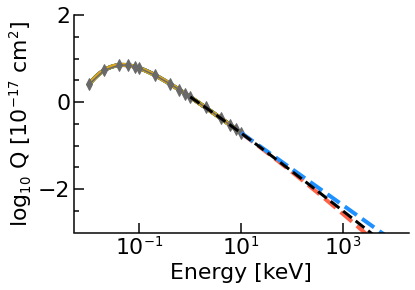

In [291]:
##
## Plot the Q_12E results (poly)
##
energy2plot = np.arange(1.02e1, 1e4, 1)/1e3
plt.plot((energy2plot), 
                   (pfit_Q12E_4deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'black',
                 )
plt.plot((energy2plot), 
                   (pfit_Q12E_5deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'tomato',
                 )
plt.plot((energy2plot), 
                   (pfit_Q12E_6deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'dodgerblue',
                 )
plt.plot((energy2plot), 
                   (pfit_Q12E_7deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'forestgreen',
                 )
plt.plot((energy2plot), 
                   (pfit_Q12E_8deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'goldenrod'
                 )
plt.plot(iaea93_Q_12E.energy, np.log10(iaea93_Q_12E.Q_12E), marker = 'd', markersize = 8, color = 'dimgrey')

energy2plot = np.arange(10, 10001,1)
plt.plot((energy2plot), 
                   (pfit_Q12E_2deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'tomato',
                 )
plt.plot((energy2plot), 
                   (pfit_Q12E_1deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'dodgerblue',
                 )

plt.plot(energy, np.log10(kerr.Q_12E), color = 'black', linestyle = '--', linewidth = 3)

# plt.xlim([5,20])
plt.ylim([-3,2])
plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')




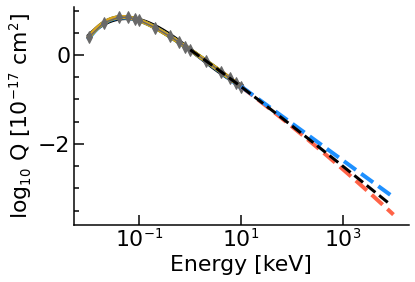

In [294]:
##
## Plot the Q_12E results (cheb)
##

energy2plot = np.arange(1.02e1, 1e4, 1)/1e3
plt.plot((energy2plot), 
                   (np.log10(np.exp(Cheb(energy2plot, cfit_Q12E_4deg, len(cfit_Q12E_4deg)-1, e1_E, e2_E)))),
                   linewidth = 4, linestyle = '-', color = 'black',
                 )
plt.plot((energy2plot), 
                   (np.log10(np.exp(Cheb(energy2plot, cfit_Q12E_5deg, len(cfit_Q12E_5deg)-1, e1_E, e2_E)))),
                   linewidth = 4, linestyle = '-', color = 'tomato',
                 )
plt.plot((energy2plot), 
                   (np.log10(np.exp(Cheb(energy2plot, cfit_Q12E_6deg, len(cfit_Q12E_6deg)-1, e1_E, e2_E)))),
                   linewidth = 4, linestyle = '-', color = 'dodgerblue',
                 )
plt.plot((energy2plot), 
                   (np.log10(np.exp(Cheb(energy2plot, cfit_Q12E_7deg, len(cfit_Q12E_7deg)-1, e1_E, e2_E)))),
                   linewidth = 4, linestyle = '-', color = 'forestgreen',
                 )
plt.plot((energy2plot), 
                   (np.log10(np.exp(Cheb(energy2plot, cfit_Q12E_8deg, len(cfit_Q12E_8deg)-1, e1_E, e2_E)))),
                   linewidth = 4, linestyle = '-', color = 'goldenrod'
                 )
plt.plot(iaea93_Q_12E.energy, np.log10(iaea93_Q_12E.Q_12E), marker = 'd', markersize = 8, color = 'dimgrey')

energy2plot = np.arange(10, 10001,1)
plt.plot((energy2plot), 
                   (pfit_Q12E_2deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'tomato',
                 )
plt.plot((energy2plot), 
                   (pfit_Q12E_1deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'dodgerblue',
                 )

plt.plot(energy, np.log10(kerr.Q_12E), color = 'black', linestyle = '--', linewidth = 3)

# plt.xlim([5,20])
# plt.ylim([-1,0])
plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')


# plt.plot(energy, np.log10(kerr.Q_1pP),linewidth=2, color = 'forestgreen')
# plt.plot(energy, np.log10(kerr_ch.Q_1pP),linewidth=2, color = 'red')




(-3.0, 1.2)

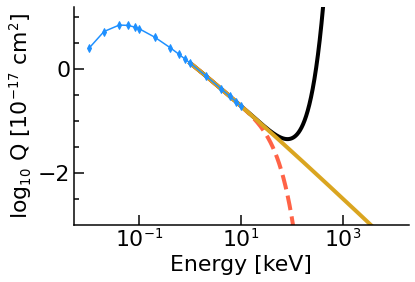

In [297]:
## 
## Compare the polynomial to chebyshev fit 
##

energy2plot = np.arange(1, 10001, 1)


plt.plot((energy2plot), 
                   (pfit_Q12E_8deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'black'
                 )
plt.plot((energy2plot), 
                   (np.log10(np.exp(Cheb(energy2plot, cfit_Q12E_8deg, len(cfit_Q12P_8deg)-1, e1_E, e2_E)))),
                   linewidth = 4, linestyle = '--', color = 'tomato',
                 )
plt.plot(kerr.energy, np.log10(kerr.Q_12E),linestyle = '-',linewidth=4, color = 'goldenrod')
plt.plot(iaea93_Q_12E.energy, np.log10(iaea93_Q_12E.Q_12E), marker = 'd', markersize = 5, color = 'dodgerblue')


plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')
plt.ylim([-3, 1.2])

> - Q_12H<br>
>> - 2s: For this we will use a combination data from Hill et al 1979 for the 1-25 keV range of 1s-2s, then the theory from McLaughlin & Bell 1983 up to 100 keV. The high energy tail will be fit.<br>
>> - 2p: For this we will use McLaughlin & Bell 1983 from 1-100 keV. The high energy tail will be fit<br>
>> - n=2: The sum 2s + 2p will be fit, along with a high energy tail.

***H(2s)***

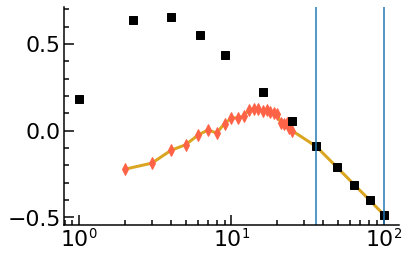

In [307]:
e1_H = 2.0
e2_H = 25.0
e3_H = 36.0
e4_H = 100.0

eind1 = np.abs(hill79.energy - e1_H).argmin()
eind2 = np.abs(hill79.energy - e2_H).argmin()
eind3 = np.abs(mb83.energy - e3_H).argmin()
eind4 = np.abs(mb83.energy - e4_H).argmin()

energy_tot = np.concatenate((hill79.energy[eind1:eind2+1], 
                             mb83.energy[eind3:eind4+1]))

csec_tot_Q12H_2s = np.concatenate((
                  hill79.Q_12H_2s[eind1:eind2+1],
                  mb83.Q_12H_2s[eind3:eind4+1]))

##
## Plot the Q_12H_2s cross sections data as a sanity check
## The vertical lines are where we will fit a linear fn in log-log for the decay.
##
plt.plot(energy_tot, np.log10(csec_tot_Q12H_2s),linewidth = 3, color = 'goldenrod')
plt.xscale('log')
plt.plot(hill79.energy, np.log10(hill79.Q_12H_2s), linestyle = 'none', marker = 'd', markersize = 8, color = 'tomato')
plt.plot(mb83.energy, np.log10(mb83.Q_12H_2s),linestyle = 'none', marker = 's', markersize = 8, color = 'black')

plt.axvline(x=36)
plt.axvline(x=100)

In [308]:
##
## Set up the fits
##
cfit_Q12H_2s_4deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(energy_tot, 
                                                          csec_tot_Q12H_2s, emin = e1_H, emax = e4_H, deg = 4)
cfit_Q12H_2s_5deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(energy_tot, 
                                                          csec_tot_Q12H_2s, emin = e1_H, emax = e4_H, deg = 5)
cfit_Q12H_2s_6deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(energy_tot, 
                                                          csec_tot_Q12H_2s, emin = e1_H, emax = e4_H, deg = 6)
cfit_Q12H_2s_7deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(energy_tot, 
                                                          csec_tot_Q12H_2s, emin = e1_H, emax = e4_H, deg = 7)
cfit_Q12H_2s_8deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(energy_tot, 
                                                          csec_tot_Q12H_2s, emin = e1_H, emax = e4_H, deg = 8)

pfit_Q12H_2s_4deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_Q12H_2s,  
                                                       order = 4, log10E = True, log10Q = True)
pfit_Q12H_2s_5deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_Q12H_2s,  
                                                       order = 5, log10E = True, log10Q = True)
pfit_Q12H_2s_6deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_Q12H_2s,  
                                                       order = 6, log10E = True, log10Q = True)
pfit_Q12H_2s_7deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_Q12H_2s,  
                                                       order = 7, log10E = True, log10Q = True)
pfit_Q12H_2s_8deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_Q12H_2s,  
                                                       order = 8, log10E = True, log10Q = True)

In [310]:
##
## Do the straight line fit to the high energy range
##
ehigh_H = 100
elow_H = 36
estart = np.abs(energy_tot - elow_H).argmin()
eend = np.abs(energy_tot - ehigh_H).argmin()
energy2fit = energy_tot[estart:eend+1]
csec2fit = csec_tot_Q12H_2s[estart:eend+1]

pfit_Q12H_2s_2deg_end = OZpy.CrossSections.cs_polyfit(energy2fit, csec2fit,  
                                                       order = 2, log10E = True, log10Q = True)
pfit_Q12H_2s_1deg_end = OZpy.CrossSections.cs_polyfit(energy2fit, csec2fit,  
                                                       order = 1, log10E = True, log10Q = True)




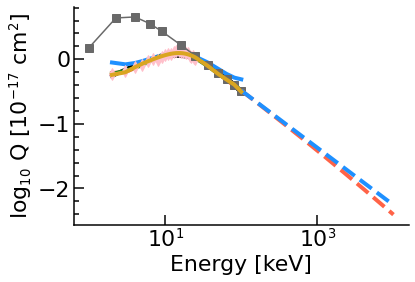

In [314]:
##
## Plot the Q_12H_2s results (cheb)
## 

plt.plot((energy_tot), 
                   (np.log10(np.exp(Cheb(energy_tot, cfit_Q12H_2s_4deg, len(cfit_Q12H_2s_4deg)-1, e1_H, e4_H)))),
                   linewidth = 4, linestyle = '-', color = 'black',
                 )
plt.plot((energy_tot), 
                   (np.log10(np.exp(Cheb(energy_tot, cfit_Q12H_2s_5deg, len(cfit_Q12H_2s_5deg)-1, e1_H, e4_H)))),
                   linewidth = 4, linestyle = '-', color = 'tomato',
                 )
plt.plot((energy_tot), 
                   (np.log10(np.exp(Cheb(energy_tot, cfit_Q12H_2s_6deg, len(cfit_Q12H_2s_6deg)-1, e1_H, e4_H)))),
                   linewidth = 4, linestyle = '-', color = 'dodgerblue',
                 )
plt.plot((energy_tot), 
                   (np.log10(np.exp(Cheb(energy_tot, cfit_Q12H_2s_7deg, len(cfit_Q12H_2s_7deg)-1, e1_H, e4_H)))),
                   linewidth = 4, linestyle = '-', color = 'forestgreen',
                 )
plt.plot((energy_tot), 
                   (np.log10(np.exp(Cheb(energy_tot, cfit_Q12H_2s_8deg, len(cfit_Q12H_2s_8deg)-1, e1_H, e4_H)))),
                   linewidth = 4, linestyle = '-', color = 'goldenrod',zorder = 50
                 )
plt.plot(hill79.energy, np.log10(hill79.Q_12H_2s), marker = 'd', markersize = 8, color = 'pink')
plt.plot(mb83.energy, np.log10(mb83.Q_12H_2s), marker = 's', markersize = 8, color = 'dimgrey')

energy2plot = np.arange(100, 10001,1)
plt.plot((energy2plot), 
                   (pfit_Q12H_2s_2deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'tomato',
                 )
plt.plot((energy2plot), 
                   (pfit_Q12H_2s_1deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'dodgerblue',
                 )

plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')




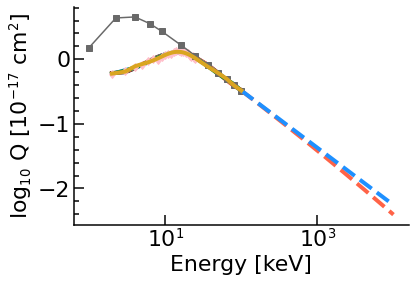

In [317]:
##
## Plot the Q_12H_2s results (poly)
##

plt.plot((energy_tot), 
                   (pfit_Q12H_2s_4deg(np.log10(energy_tot))),
                   linewidth = 4, linestyle = '-', color = 'black',
                 )
plt.plot((energy_tot), 
                   (pfit_Q12H_2s_5deg(np.log10(energy_tot))),
                   linewidth = 4, linestyle = '-', color = 'tomato',
                 )
plt.plot((energy_tot), 
                   (pfit_Q12H_2s_6deg(np.log10(energy_tot))),
                   linewidth = 4, linestyle = '-', color = 'dodgerblue',
                 )
plt.plot((energy_tot), 
                   (pfit_Q12H_2s_7deg(np.log10(energy_tot))),
                   linewidth = 4, linestyle = '-', color = 'forestgreen',
                 )
plt.plot((energy_tot), 
                   (pfit_Q12H_2s_8deg(np.log10(energy_tot))),
                   linewidth = 4, linestyle = '-', color = 'goldenrod',zorder = 50
                 )
plt.plot(hill79.energy, np.log10(hill79.Q_12H_2s), marker = 'd', markersize = 6, color = 'pink')
plt.plot(mb83.energy, np.log10(mb83.Q_12H_2s), marker = 's', markersize = 6, color = 'dimgrey')

energy2plot = np.arange(100, 10001,1)
plt.plot((energy2plot), 
                   (pfit_Q12H_2s_2deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'tomato',
                 )
plt.plot((energy2plot), 
                   (pfit_Q12H_2s_1deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'dodgerblue',
                 )
plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')


# plt.plot(energy, np.log10(kerr.Q_12H_2s),linewidth=2, color = 'forestgreen')
# plt.plot(energy, np.log10(kerr_ch.Q_12H_2s),linewidth=2, color = 'red')



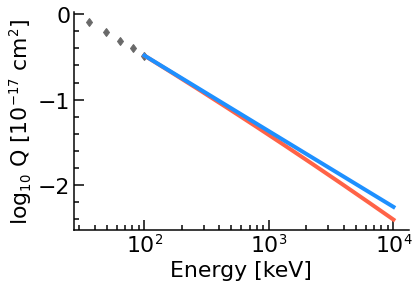

In [318]:
##
## Plot the Q_12H_2s results (poly)
##

plt.plot((energy_tot), 
                   (pfit_Q12H_2s_4deg(np.log10(energy_tot))),
                   linewidth = 4, linestyle = '-', color = 'black',
                 )
plt.plot((energy_tot), 
                   (pfit_Q12H_2s_5deg(np.log10(energy_tot))),
                   linewidth = 4, linestyle = '-', color = 'tomato',
                 )
plt.plot((energy_tot), 
                   (pfit_Q12H_2s_6deg(np.log10(energy_tot))),
                   linewidth = 4, linestyle = '-', color = 'dodgerblue',
                 )
plt.plot((energy_tot), 
                   (pfit_Q12H_2s_7deg(np.log10(energy_tot))),
                   linewidth = 4, linestyle = '-', color = 'forestgreen',
                 )
plt.plot((energy_tot), 
                   (pfit_Q12H_2s_8deg(np.log10(energy_tot))),
                   linewidth = 4, linestyle = '-', color = 'goldenrod',zorder = 50
                 )
plt.plot(hill79.energy, np.log10(hill79.Q_12H_2s), marker = 'd', markersize = 6, color = 'pink')
plt.plot(mb83.energy, np.log10(mb83.Q_12H_2s), marker = 's', markersize = 6, color = 'dimgrey')

energy2plot = np.arange(100, 10001,1)
plt.plot((energy2plot), 
                   (pfit_Q12H_2s_2deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'tomato',
                 )
plt.plot((energy2plot), 
                   (pfit_Q12H_2s_1deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'dodgerblue',
                 )
plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')


# plt.plot(energy, np.log10(kerr.Q_12H_2s),linewidth=2, color = 'forestgreen')
# plt.plot(energy, np.log10(kerr_ch.Q_12H_2s),linewidth=2, color = 'red')





***H(2p)***

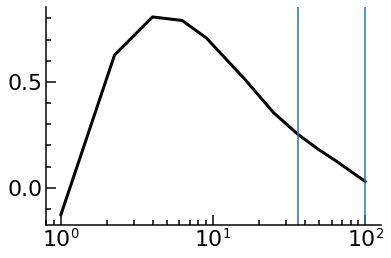

In [321]:
##
## Plot the Q_12H_2s cross sections data as a sanity check
## The vertical lines are where we will fit a linear fn in log-log for the decay.
##
plt.plot(mb83.energy, np.log10(mb83.Q_12H_2p),linewidth = 3, color = 'black')
plt.xscale('log')

plt.axvline(x=36)
plt.axvline(x=100)


In [330]:
##
## Set up the fits
##
emin = 1
emax = 100
cfit_Q12H_2p_4deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(mb83.energy, 
                                                          mb83.Q_12H_2p, emin = emin, emax = emax, deg = 4)
cfit_Q12H_2p_5deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(mb83.energy, 
                                                          mb83.Q_12H_2p, emin = emin, emax = emax, deg = 5)
cfit_Q12H_2p_6deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(mb83.energy, 
                                                          mb83.Q_12H_2p, emin = emin, emax = emax, deg = 6)
cfit_Q12H_2p_7deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(mb83.energy, 
                                                          mb83.Q_12H_2p, emin = emin, emax = emax, deg = 7)
cfit_Q12H_2p_8deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(mb83.energy, 
                                                          mb83.Q_12H_2p, emin = emin, emax = emax, deg = 8)

pfit_Q12H_2p_4deg = OZpy.CrossSections.cs_polyfit(mb83.energy, mb83.Q_12H_2p,  
                                                       order = 4, log10E = True, log10Q = True)
pfit_Q12H_2p_5deg = OZpy.CrossSections.cs_polyfit(mb83.energy, mb83.Q_12H_2p,  
                                                       order = 5, log10E = True, log10Q = True)
pfit_Q12H_2p_6deg = OZpy.CrossSections.cs_polyfit(mb83.energy, mb83.Q_12H_2p,  
                                                       order = 6, log10E = True, log10Q = True)
pfit_Q12H_2p_7deg = OZpy.CrossSections.cs_polyfit(mb83.energy, mb83.Q_12H_2p,  
                                                       order = 7, log10E = True, log10Q = True)
pfit_Q12H_2p_8deg = OZpy.CrossSections.cs_polyfit(mb83.energy, mb83.Q_12H_2p,  
                                                       order = 8, log10E = True, log10Q = True)

In [331]:
##
## Do the straight line fit to the high energy range
##
ehigh_H = 100
elow_H = 36
estart = np.abs(mb83.energy - elow_H).argmin()
eend = np.abs(mb83.energy - ehigh_H).argmin()
energy2fit = mb83.energy[estart:eend+1]
csec2fit = mb83.Q_12H_2p[estart:eend+1]

pfit_Q12H_2p_2deg_end = OZpy.CrossSections.cs_polyfit(energy2fit, csec2fit,  
                                                       order = 2, log10E = True, log10Q = True)
pfit_Q12H_2p_1deg_end = OZpy.CrossSections.cs_polyfit(energy2fit, csec2fit,  
                                                       order = 1, log10E = True, log10Q = True)




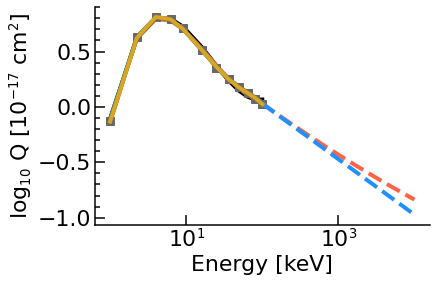

In [332]:
##
## Plot the Q_12H_2p results (cheb)
## 

plt.plot((mb83.energy), 
                   (np.log10(np.exp(Cheb(mb83.energy, cfit_Q12H_2p_4deg, len(cfit_Q12H_2p_4deg)-1, emin, emax)))),
                   linewidth = 4, linestyle = '-', color = 'black',
                 )
plt.plot((mb83.energy), 
                   (np.log10(np.exp(Cheb(mb83.energy, cfit_Q12H_2p_5deg, len(cfit_Q12H_2p_5deg)-1, emin, emax)))),
                   linewidth = 4, linestyle = '-', color = 'tomato',
                 )
plt.plot((mb83.energy), 
                   (np.log10(np.exp(Cheb(mb83.energy, cfit_Q12H_2p_6deg, len(cfit_Q12H_2p_6deg)-1, emin, emax)))),
                   linewidth = 4, linestyle = '-', color = 'dodgerblue',
                 )
plt.plot((mb83.energy), 
                   (np.log10(np.exp(Cheb(mb83.energy, cfit_Q12H_2p_7deg, len(cfit_Q12H_2p_7deg)-1, emin, emax)))),
                   linewidth = 4, linestyle = '-', color = 'forestgreen',
                 )
plt.plot((mb83.energy), 
                   (np.log10(np.exp(Cheb(mb83.energy, cfit_Q12H_2p_8deg, len(cfit_Q12H_2p_8deg)-1, emin, emax)))),
                   linewidth = 4, linestyle = '-', color = 'goldenrod',zorder = 50
                 )
plt.plot(mb83.energy, np.log10(mb83.Q_12H_2p), marker = 's', markersize = 8, color = 'dimgrey')

energy2plot = np.arange(100, 10001,1)
plt.plot((energy2plot), 
                   (pfit_Q12H_2p_2deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'tomato',
                 )
plt.plot((energy2plot), 
                   (pfit_Q12H_2p_1deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'dodgerblue',
                 )

plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')



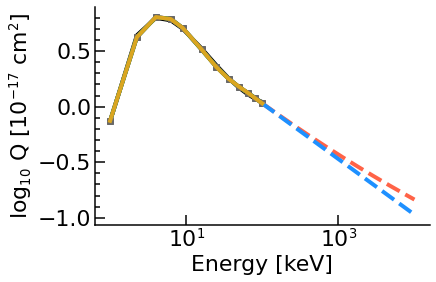

In [333]:
##
## Plot the Q_12H_2p results (poly)
##

plt.plot((mb83.energy), 
                   (pfit_Q12H_2p_4deg(np.log10(mb83.energy))),
                   linewidth = 4, linestyle = '-', color = 'black',
                 )
plt.plot((mb83.energy), 
                   (pfit_Q12H_2p_5deg(np.log10(mb83.energy))),
                   linewidth = 4, linestyle = '-', color = 'tomato',
                 )
plt.plot((mb83.energy), 
                   (pfit_Q12H_2p_6deg(np.log10(mb83.energy))),
                   linewidth = 4, linestyle = '-', color = 'dodgerblue',
                 )
plt.plot((mb83.energy), 
                   (pfit_Q12H_2p_7deg(np.log10(mb83.energy))),
                   linewidth = 4, linestyle = '-', color = 'forestgreen',
                 )
plt.plot((mb83.energy), 
                   (pfit_Q12H_2p_8deg(np.log10(mb83.energy))),
                   linewidth = 4, linestyle = '-', color = 'goldenrod',zorder = 50
                 )
plt.plot(mb83.energy, np.log10(mb83.Q_12H_2p), marker = 's', markersize = 6, color = 'dimgrey')

energy2plot = np.arange(100, 10001,1)
plt.plot((energy2plot), 
                   (pfit_Q12H_2p_2deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'tomato',
                 )
plt.plot((energy2plot), 
                   (pfit_Q12H_2p_1deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'dodgerblue',
                 )
plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')


# plt.plot(energy, np.log10(kerr.Q_12H_2p),linewidth=2, color = 'forestgreen')
# plt.plot(energy, np.log10(kerr_ch.Q_12H_2p),linewidth=2, color = 'red')

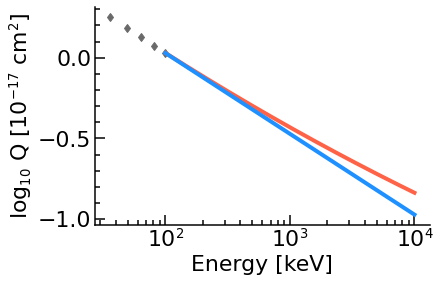

In [334]:
##
## A closer Look at the high energy extrapolation 
##

plt.plot(energy2fit,np.log10(csec2fit), marker = 'd', color = 'dimgrey', linestyle = 'none')

energy2plot = np.arange(100, 10001,1)
plt.plot((energy2plot), 
                   (pfit_Q12H_2p_2deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'tomato',
                 )
plt.plot((energy2plot), 
                   (pfit_Q12H_2p_1deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'dodgerblue',
                 )
plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')



***H(n=2)***

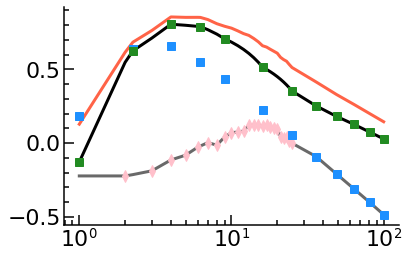

In [350]:
e1_H = 2.0
e2_H = 25.0
e3_H = 36.0
e4_H = 100.0

eind1 = np.abs(hill79.energy - e1_H).argmin()
eind2 = np.abs(hill79.energy - e2_H).argmin()
eind3 = np.abs(mb83.energy - e3_H).argmin()
eind4 = np.abs(mb83.energy - e4_H).argmin()

energy_tot_2s = np.concatenate((hill79.energy[eind1:eind2+1], 
                             mb83.energy[eind3:eind4+1]))
energy_tot_2p = mb83.energy
energy_tot = np.unique(np.concatenate((energy_tot_2s,energy_tot_2p)))
csec_tot_Q12H_2s = np.concatenate((
                  hill79.Q_12H_2s[eind1:eind2+1],
                  mb83.Q_12H_2s[eind3:eind4+1]))
csec_tot_Q12H_2p = mb83.Q_12H_2p
csec_tot_Q12H_2s_intp = np.interp(energy_tot,energy_tot_2s,csec_tot_Q12H_2s)
csec_tot_Q12H_2p_intp = np.interp(energy_tot,energy_tot_2p,csec_tot_Q12H_2p)
csec_tot_Q12H = csec_tot_Q12H_2s_intp + csec_tot_Q12H_2p_intp

# ##
# ## Plot the Q_12H_2s cross sections data as a sanity check
# ## The vertical lines are where we will fit a linear fn in log-log for the decay.
# ##
plt.plot(energy_tot, np.log10(csec_tot_Q12H_2s_intp),linewidth = 3, color = 'dimgrey')
plt.plot(energy_tot, np.log10(csec_tot_Q12H_2p_intp),linewidth = 3, color = 'black')
plt.plot(energy_tot, np.log10(csec_tot_Q12H),linewidth = 3, color = 'tomato')




plt.xscale('log')
plt.plot(hill79.energy, np.log10(hill79.Q_12H_2s), linestyle = 'none', marker = 'd', markersize = 8, color = 'pink')
plt.plot(mb83.energy, np.log10(mb83.Q_12H_2s),linestyle = 'none', marker = 's', markersize = 8, color = 'dodgerblue')
plt.plot(mb83.energy, np.log10(mb83.Q_12H_2p),linestyle = 'none', marker = 's', markersize = 8, color = 'forestgreen')


# plt.axvline(x=36)
# plt.axvline(x=100)

In [353]:
##
## Set up the fits
##
emin = 1
emax = 100
cfit_Q12H_4deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(energy_tot, 
                                                          csec_tot_Q12H, emin = emin, emax = emax, deg = 4)
cfit_Q12H_5deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(energy_tot, 
                                                          csec_tot_Q12H, emin = emin, emax = emax, deg = 5)
cfit_Q12H_6deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(energy_tot, 
                                                          csec_tot_Q12H, emin = emin, emax = emax, deg = 6)
cfit_Q12H_7deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(energy_tot, 
                                                          csec_tot_Q12H, emin = emin, emax = emax, deg = 7)
cfit_Q12H_8deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(energy_tot, 
                                                          csec_tot_Q12H, emin = emin, emax = emax, deg = 8)

pfit_Q12H_4deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_Q12H,  
                                                       order = 4, log10E = True, log10Q = True)
pfit_Q12H_5deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_Q12H,  
                                                       order = 5, log10E = True, log10Q = True)
pfit_Q12H_6deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_Q12H,  
                                                       order = 6, log10E = True, log10Q = True)
pfit_Q12H_7deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_Q12H,  
                                                       order = 7, log10E = True, log10Q = True)
pfit_Q12H_8deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_Q12H,  
                                                       order = 8, log10E = True, log10Q = True)

In [352]:
##
## Do the straight line fit to the high energy range
##
ehigh_H = 100
elow_H = 36
estart = np.abs(energy_tot - elow_H).argmin()
eend = np.abs(energy_tot - ehigh_H).argmin()
energy2fit = energy_tot[estart:eend+1]
csec2fit = csec_tot_Q12H[estart:eend+1]

pfit_Q12H_2deg_end = OZpy.CrossSections.cs_polyfit(energy2fit, csec2fit,  
                                                       order = 2, log10E = True, log10Q = True)
pfit_Q12H_1deg_end = OZpy.CrossSections.cs_polyfit(energy2fit, csec2fit,  
                                                       order = 1, log10E = True, log10Q = True)



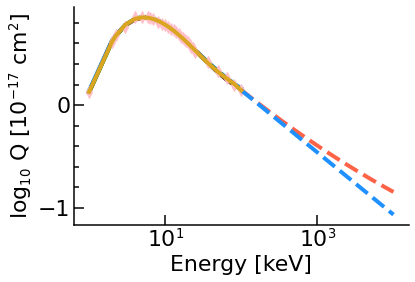

In [355]:
##
## Plot the Q_12H results (cheb)
## 
emin = 1
emax = 100
plt.plot((energy_tot), 
                   (np.log10(np.exp(Cheb(energy_tot, cfit_Q12H_4deg, len(cfit_Q12H_4deg)-1, emin, emax)))),
                   linewidth = 4, linestyle = '-', color = 'black',
                 )
plt.plot((energy_tot), 
                   (np.log10(np.exp(Cheb(energy_tot, cfit_Q12H_5deg, len(cfit_Q12H_5deg)-1, emin, emax)))),
                   linewidth = 4, linestyle = '-', color = 'tomato',
                 )
plt.plot((energy_tot), 
                   (np.log10(np.exp(Cheb(energy_tot, cfit_Q12H_6deg, len(cfit_Q12H_6deg)-1, emin, emax)))),
                   linewidth = 4, linestyle = '-', color = 'dodgerblue',
                 )
plt.plot((energy_tot), 
                   (np.log10(np.exp(Cheb(energy_tot, cfit_Q12H_7deg, len(cfit_Q12H_7deg)-1, emin, emax)))),
                   linewidth = 4, linestyle = '-', color = 'forestgreen',
                 )
plt.plot((energy_tot), 
                   (np.log10(np.exp(Cheb(energy_tot, cfit_Q12H_8deg, len(cfit_Q12H_8deg)-1, emin, emax)))),
                   linewidth = 4, linestyle = '-', color = 'goldenrod',zorder = 50
                 )
plt.plot(energy_tot, np.log10(csec_tot_Q12H), marker = 'd', markersize = 8, color = 'pink')
# plt.plot(mb83.energy, np.log10(mb83.Q_12H_2s), marker = 's', markersize = 8, color = 'dimgrey')

energy2plot = np.arange(100, 10001,1)
plt.plot((energy2plot), 
                   (pfit_Q12H_2deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'tomato',
                 )
plt.plot((energy2plot), 
                   (pfit_Q12H_1deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'dodgerblue',
                 )

plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')




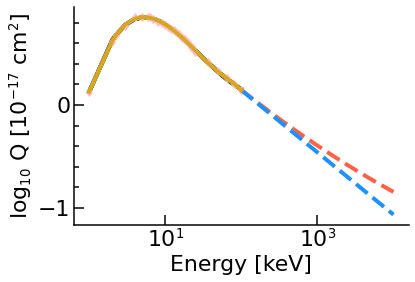

In [356]:
##
## Plot the Q_12H results (poly)
##

plt.plot((energy_tot), 
                   (pfit_Q12H_4deg(np.log10(energy_tot))),
                   linewidth = 4, linestyle = '-', color = 'black',
                 )
plt.plot((energy_tot), 
                   (pfit_Q12H_5deg(np.log10(energy_tot))),
                   linewidth = 4, linestyle = '-', color = 'tomato',
                 )
plt.plot((energy_tot), 
                   (pfit_Q12H_6deg(np.log10(energy_tot))),
                   linewidth = 4, linestyle = '-', color = 'dodgerblue',
                 )
plt.plot((energy_tot), 
                   (pfit_Q12H_7deg(np.log10(energy_tot))),
                   linewidth = 4, linestyle = '-', color = 'forestgreen',
                 )
plt.plot((energy_tot), 
                   (pfit_Q12H_8deg(np.log10(energy_tot))),
                   linewidth = 4, linestyle = '-', color = 'goldenrod',zorder = 50
                 )
plt.plot(energy_tot, np.log10(csec_tot_Q12H), marker = 'd', markersize = 6, color = 'pink')

energy2plot = np.arange(100, 10001,1)
plt.plot((energy2plot), 
                   (pfit_Q12H_2deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'tomato',
                 )
plt.plot((energy2plot), 
                   (pfit_Q12H_1deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'dodgerblue',
                 )
plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')


# plt.plot(energy, np.log10(kerr.Q_12H_2s),linewidth=2, color = 'forestgreen')
# plt.plot(energy, np.log10(kerr_ch.Q_12H_2s),linewidth=2, color = 'red')




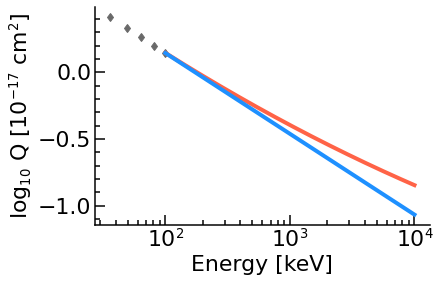

In [357]:
##
## A closer Look at the high energy extrapolation 
##

plt.plot(energy2fit,np.log10(csec2fit), marker = 'd', color = 'dimgrey', linestyle = 'none')

energy2plot = np.arange(100, 10001,1)
plt.plot((energy2plot), 
                   (pfit_Q12H_2deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'tomato',
                 )
plt.plot((energy2plot), 
                   (pfit_Q12H_1deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'dodgerblue',
                 )
plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')



---
### <b style="color:blue"> Do the fits work? </b>

***Compare to other values cross sections***

In [387]:
# energy = np.arange(1.5e1/1e3, 100, 1e-3)
energy = np.arange(1, 8001, 1)
cs = OZpy.CrossSections.CrossSec(energy)

f95 = cs.cs_fang95()
bw99 = cs.cs_bw99()
kerr = cs.cs_kerr_poly()
kerr_ch = cs.cs_kerr_cheb()


> - Q_12P

(-1.0, 1.5)

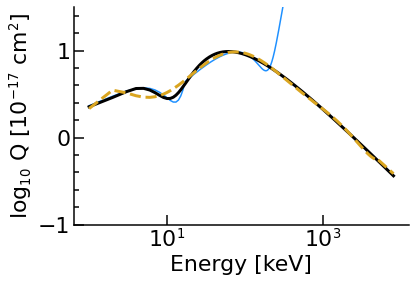

In [388]:
##
## Compare Fang et al 1995, Brosius & Woodgate 1999, and my fits
##
plt.plot(energy, np.log10(f95.Q_12P), color = 'dodgerblue')
# plt.plot(energy, np.log10(bw99.Q_12P), color = 'tomato')
plt.plot(energy, np.log10(kerr.Q_12P), color = 'black', linewidth = 3)
plt.plot(energy, np.log10(kerr.Q_12P_alt), color = 'goldenrod', linestyle = '--', linewidth = 3)

plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')
plt.ylim([-1, 1.5])


> - Q_12E

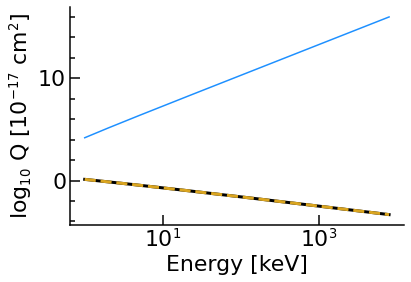

In [390]:
##
## Compare Fang et al 1995, Brosius & Woodgate 1999, and my fits
##
plt.plot(energy, np.log10(f95.Q_12E), color = 'dodgerblue')
# plt.plot(energy, np.log10(bw99.Q_12E), color = 'tomato')
plt.plot(energy, np.log10(kerr.Q_12E), color = 'black', linewidth = 3)
plt.plot(energy, np.log10(kerr_ch.Q_12E), color = 'goldenrod', linestyle = '--', linewidth = 3)

plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')
# plt.ylim([-1, 1.5])



> - Q_12H

<ipython-input-396-9c1d0442856a>:4: RuntimeWarning: invalid value encountered in log10
  plt.plot(energy, np.log10(f95.Q_12H), color = 'dodgerblue')


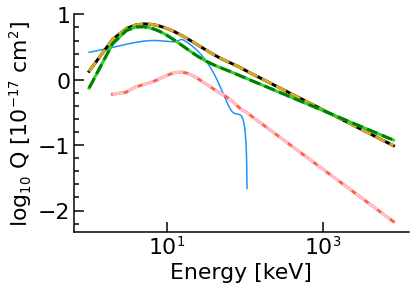

In [396]:
##
## Compare Fang et al 1995, Brosius & Woodgate 1999, and my fits
##
plt.plot(energy, np.log10(f95.Q_12H), color = 'dodgerblue')
# plt.plot(energy, np.log10(bw99.Q_12E), color = 'tomato')
plt.plot(energy, np.log10(kerr.Q_12H), color = 'black', linewidth = 3)
plt.plot(energy, np.log10(kerr_ch.Q_12H), color = 'goldenrod', linestyle = '--', linewidth = 3)

plt.plot(energy[1:], np.log10(kerr.Q_12H_2s[1:]), color = 'tomato', linewidth = 3)
plt.plot(energy[1:], np.log10(kerr_ch.Q_12H_2s[1:]), color = 'pink', linestyle = '--', linewidth = 3)

plt.plot(energy, np.log10(kerr.Q_12H_2p), color = 'limegreen', linewidth = 3)
plt.plot(energy, np.log10(kerr_ch.Q_12H_2p), color = 'green', linestyle = '--', linewidth = 3)


plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')
# plt.ylim([-1, 1.5])



findfont: Font family ['Avenir LT Std'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Avenir LT Std'] not found. Falling back to DejaVu Sans.


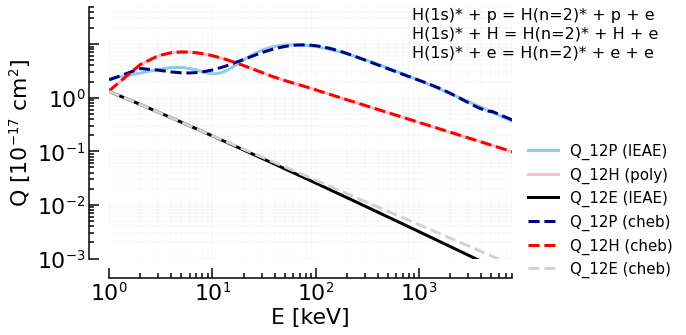

In [397]:
savepng = True
fname_out = 'MyFits_Q_12_all'
dir1 = './'

logy = True
logx = True

csid1 = 'H(1s)* + p = H(n=2)* + p + e'
csid2 = 'H(1s)* + H = H(n=2)* + H + e'
csid3 = 'H(1s)* + e = H(n=2)* + e + e'


xrange = [1, 8000]
yrange = [1e-3, 50]
cmaptemp = pal.cartocolors.sequential.Sunset_5.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.1,1.0,5))


labels = ['Q_12P (IEAE)', 'Q_12H (poly)', 'Q_12E (IEAE)', 'Q_12P (cheb)', 'Q_12H (cheb)', 'Q_12E (cheb)']

if logx == True:
    xtitle = 'E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.75, 0.95, csid1, color = 'black',transform=ax1.transAxes,fontsize = 16)   
ax1.text(0.75, 0.875, csid2, color = 'black',transform=ax1.transAxes,fontsize = 16)     
ax1.text(0.75, 0.80, csid3, color = 'black',transform=ax1.transAxes,fontsize = 16)     


# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(energy, (kerr.Q_12P), color = 'skyblue',
                   linewidth = 3, linestyle = '-',
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[0]
                 )
line2, = ax1.plot(energy, (kerr.Q_12H), color = 'pink',
                   linewidth = 3, linestyle = '-',
#                   zorder = 50, alpha = 1,
#                    marker = 'd', markeredgewidth = 1, 
#                    markersize = 5,
                   label = labels[1]
                 )
line3, = ax1.plot(energy, (kerr.Q_12E), color = 'black',
                   linewidth = 3, linestyle = '-',
#                   zorder = 0, alpha = 0.35,
#                    marker = 'X', markeredgewidth = 1, 
#                    markersize = 5,
                   label = labels[2]
                 )
line4, = ax1.plot(energy, (kerr.Q_12P_alt), color = 'darkblue',
                   linewidth = 3, linestyle = '--',
#                   zorder = 0, alpha = 0.35,
#                    marker = 'D', markeredgewidth = 1, 
#                    markersize = 5,
                   label = labels[3]
                 )
line5, = ax1.plot(energy, (kerr_ch.Q_12H), color = 'red',
                   linewidth = 3, linestyle = '--',
#                   zorder = 0, alpha = 0.35,
#                    marker = 'o', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[4]
                 )
line6, = ax1.plot(energy, (kerr.Q_12E_alt), color = 'lightgrey',
                   linewidth = 3, linestyle = '--',
#                   zorder = 0, alpha = 0.35,
#                    marker = 's', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[5]
                 )




leg1 = ax1.legend(handles=[line1,line2,line3,line4,line5,line6],loc=(1.025,-0.10), fontsize = 15)

# ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()